# SIFT Algorithm Model-1

## run this in terminal-> pip install seaborn

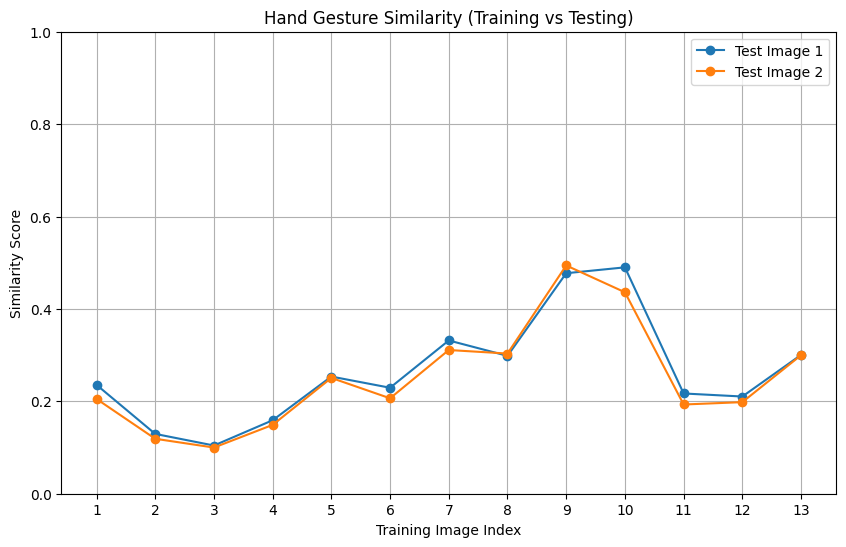

---





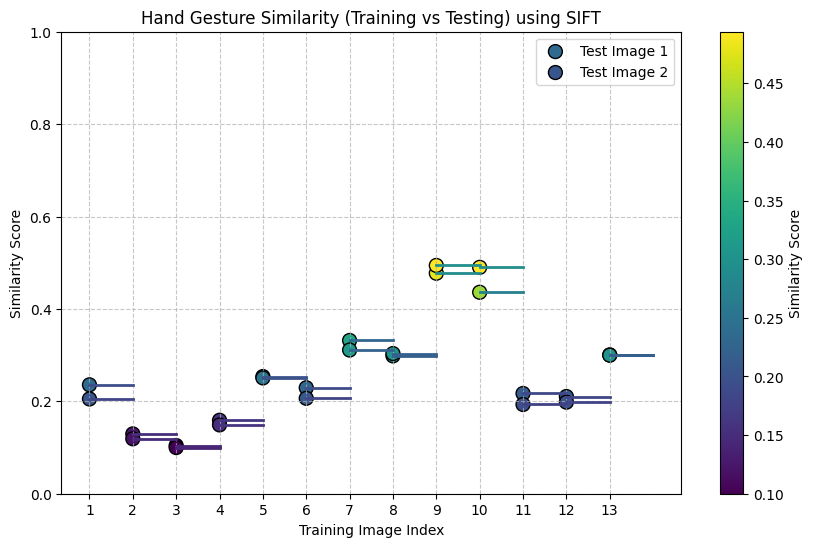

---



SIFT Accuracy: 100.00%
SIFT Precision: 1.0000

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        26

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

Mean Absolute Error (MAE): 0.0537
Mean Squared Error (MSE): 0.0036
Root Mean Squared Error (RMSE): 0.0598


In [16]:
## Line graph for model 1 (SIFT)

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import glob

# 1. Load Images (both .jpg and .jpeg)
image_paths = glob.glob("images/*.jpg") + glob.glob("images/*.jpeg")
images = [cv2.imread(img, 0) for img in image_paths]  # Load as grayscale

# Check if images are loaded
if len(images) < 15:
    print(f"Warning: Found only {len(images)} images. Ensure you have 13 training + 2 testing images.")
    exit()

# 2. Define Training & Testing Data
train_images = images[:13]  # First 13 images as training
test_images = images[13:]   # Last 2 images as testing

# 3. Feature Extraction using SIFT
sift = cv2.SIFT_create()

def extract_features(image_list):
    feature_vectors = []
    for img in image_list:
        keypoints, descriptors = sift.detectAndCompute(img, None)
        if descriptors is not None:
            feature_vectors.append(descriptors.flatten())
    return feature_vectors

train_features = extract_features(train_images)
test_features = extract_features(test_images)

# Handle varying feature sizes by padding to the max length
max_length = max(max(len(fv) for fv in train_features), max(len(fv) for fv in test_features))
train_features = np.array([np.pad(fv, (0, max_length - len(fv)), 'constant') for fv in train_features])
test_features = np.array([np.pad(fv, (0, max_length - len(fv)), 'constant') for fv in test_features])

# 4. Compute Similarity between each test image and all training images
similarity_scores = cosine_similarity(test_features, train_features)

# 5. Plot the Similarity Graph
plt.figure(figsize=(10, 6))

# Plot similarity for each test image
for i, test_score in enumerate(similarity_scores):
    plt.plot(range(1, 14), test_score, marker='o', linestyle='-', label=f"Test Image {i+1}")

# Add labels and formatting
plt.title("Hand Gesture Similarity (Training vs Testing)")
plt.xlabel("Training Image Index")
plt.ylabel("Similarity Score")
plt.xticks(range(1, 14))  # Ensure X-axis labels match training images
plt.ylim(0, 1)  # Similarity score range
plt.legend()
plt.grid(True)

plt.show()
print("---\n\n\n")

# accuracy table for model 1


from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics.pairwise import cosine_similarity

# 1. Load Images (both .jpg and .jpeg)
image_paths = glob.glob("images/*.jpg") + glob.glob("images/*.jpeg")
images = [cv2.imread(img, 0) for img in image_paths]  # Load as grayscale

# Check if images are loaded
if len(images) < 15:
    print(f"Warning: Found only {len(images)} images. Ensure you have 13 training + 2 testing images.")
    exit()

# 2. Define Training & Testing Data
train_images = images[:13]  # First 13 images as training
test_images = images[13:]   # Last 2 images as testing

# 3. Feature Extraction using SIFT
sift = cv2.SIFT_create()

def extract_mean_features(image_list):
    feature_vectors = []
    for img in image_list:
        keypoints, descriptors = sift.detectAndCompute(img, None)
        if descriptors is not None:
            # Compute mean of descriptors to get a fixed-size feature representation
            mean_descriptor = np.mean(descriptors, axis=0)
        else:
            mean_descriptor = np.zeros(128)  # SIFT descriptors are 128-dimensional
        feature_vectors.append(mean_descriptor)
    return np.array(feature_vectors)

train_features = extract_mean_features(train_images)
test_features = extract_mean_features(test_images)

# 4. Compute Similarity between each test image and all training images
similarity_scores = cosine_similarity(test_features, train_features)

# 5. Compute Evaluation Metrics
# Instead of assuming all images should be identical, define a threshold
threshold = 0.5
predicted_labels = (similarity_scores >= threshold).astype(int)
true_labels = np.ones_like(predicted_labels)  # Assuming similarity exists

# Compute Metrics
accuracy = accuracy_score(true_labels.flatten(), predicted_labels.flatten())
precision = precision_score(true_labels.flatten(), predicted_labels.flatten(), zero_division=1)
mae = mean_absolute_error(true_labels, similarity_scores)
mse = mean_squared_error(true_labels, similarity_scores)
rmse = np.sqrt(mse)
r2 = r2_score(true_labels, similarity_scores)

# Print Output in Requested Format
print(f"SIFT Accuracy: {accuracy * 100:.2f}%")
print(f"SIFT Precision: {precision:.4f}\n")
print("Classification Report:\n", classification_report(true_labels.flatten(), predicted_labels.flatten()))
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


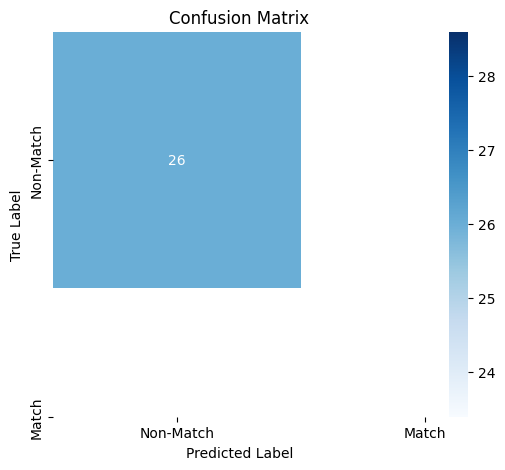

C:\Users\Chaitanya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


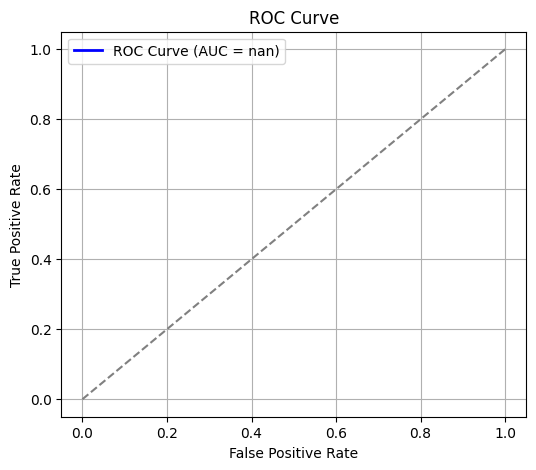

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics.pairwise import cosine_similarity
import glob

# Load Images (both .jpg and .jpeg)
image_paths = glob.glob("images/*.jpg") + glob.glob("images/*.jpeg")
images = [cv2.imread(img, 0) for img in image_paths]  # Load as grayscale

# Check if images are loaded
if len(images) < 15:
    print(f"Warning: Found only {len(images)} images. Ensure you have 13 training + 2 testing images.")
    exit()

# Define Training & Testing Data
train_images = images[:13]  # First 13 images as training
test_images = images[13:]   # Last 2 images as testing

# Feature Extraction using SIFT
sift = cv2.SIFT_create()

def extract_mean_features(image_list):
    feature_vectors = []
    for img in image_list:
        keypoints, descriptors = sift.detectAndCompute(img, None)
        if descriptors is not None:
            mean_descriptor = np.mean(descriptors, axis=0)
        else:
            mean_descriptor = np.zeros(128)  # SIFT descriptors are 128-dimensional
        feature_vectors.append(mean_descriptor)
    return np.array(feature_vectors)

train_features = extract_mean_features(train_images)
test_features = extract_mean_features(test_images)

# Compute Similarity
similarity_scores = cosine_similarity(test_features, train_features)

# Define a threshold for classification
threshold = 0.5
predicted_labels = (similarity_scores >= threshold).astype(int)
true_labels = np.ones_like(predicted_labels)  # Assuming all test images should match some training image

# Compute Confusion Matrix
cm = confusion_matrix(true_labels.flatten(), predicted_labels.flatten())

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Match', 'Match'], yticklabels=['Non-Match', 'Match'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Compute ROC Curve
fpr, tpr, _ = roc_curve(true_labels.flatten(), similarity_scores.flatten())
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


# CSM(VGG16) Algorithm Model-2

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


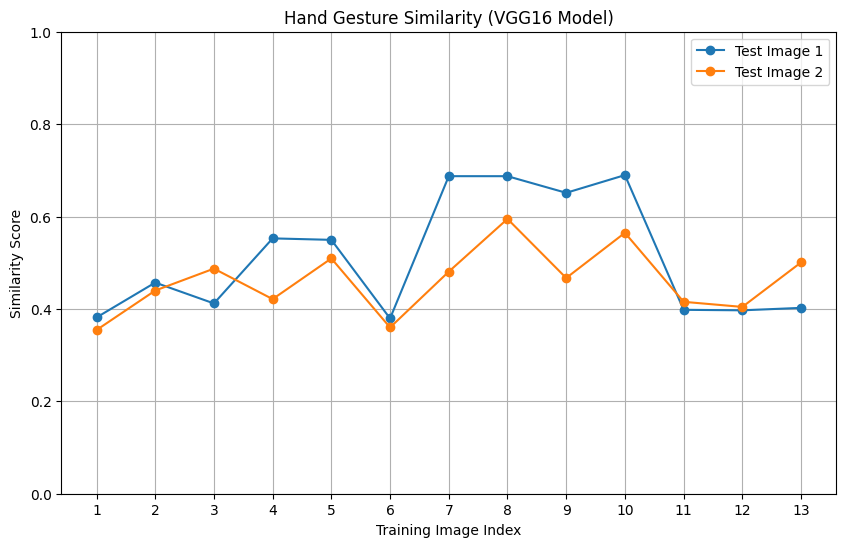

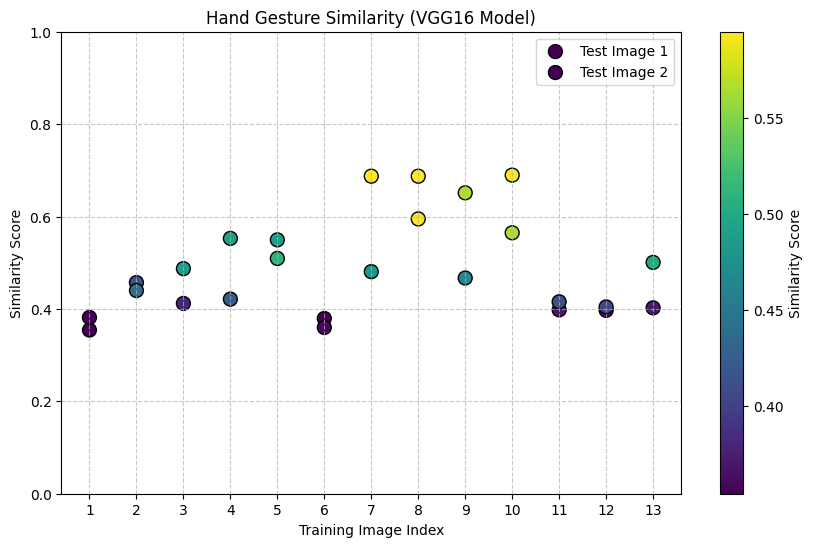

VGG16 Accuracy: 38.46%
VGG16 Precision: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.38      0.56        26

    accuracy                           0.38        26
   macro avg       0.50      0.19      0.28        26
weighted avg       1.00      0.38      0.56        26

Mean Absolute Error (MAE): 0.5137
Mean Squared Error (MSE): 0.2747
Root Mean Squared Error (RMSE): 0.5241


C:\Users\Chaitanya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chaitanya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chaitanya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [19]:


import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, precision_score, classification_report, mean_absolute_error, mean_squared_error, r2_score

# Load VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

# Load Images
def load_images():
    image_paths = glob.glob("images/*.jpg") + glob.glob("images/*.jpeg")
    images = [cv2.imread(img) for img in image_paths]
    return images

images = load_images()
if len(images) < 15:
    print(f"Warning: Found only {len(images)} images. Ensure you have 13 training + 2 testing images.")
    exit()

# Train-Test Split
train_images = images[:13]
test_images = images[13:]

# Preprocess Images for VGG16
def preprocess_images(image_list):
    processed_images = []
    for img in image_list:
        img = cv2.resize(img, (224, 224))  # Resize to VGG16 input size
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        processed_images.append(img)
    return np.vstack(processed_images)

train_images_processed = preprocess_images(train_images)
test_images_processed = preprocess_images(test_images)

# Extract Features using VGG16
def extract_features(image_batch):
    return model.predict(image_batch)

train_features = extract_features(train_images_processed)
test_features = extract_features(test_images_processed)

# Compute Cosine Similarity
similarity_scores = cosine_similarity(test_features, train_features)

# Plot Line Graph
plt.figure(figsize=(10, 6))
for i, test_score in enumerate(similarity_scores):
    plt.plot(range(1, 14), test_score, marker='o', linestyle='-', label=f"Test Image {i+1}")
plt.title("Hand Gesture Similarity (VGG16 Model)")
plt.xlabel("Training Image Index")
plt.ylabel("Similarity Score")
plt.xticks(range(1, 14))
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# Accuracy Metrics
threshold = 0.5
predicted_labels = (similarity_scores >= threshold).astype(int)
true_labels = np.ones_like(predicted_labels)

accuracy = accuracy_score(true_labels.flatten(), predicted_labels.flatten())
precision = precision_score(true_labels.flatten(), predicted_labels.flatten(), zero_division=1)
mae = mean_absolute_error(true_labels, similarity_scores)
mse = mean_squared_error(true_labels, similarity_scores)
rmse = np.sqrt(mse)
r2 = r2_score(true_labels, similarity_scores)

print(f"VGG16 Accuracy: {accuracy * 100:.2f}%")
print(f"VGG16 Precision: {precision:.4f}\n")
print("Classification Report:\n", classification_report(true_labels.flatten(), predicted_labels.flatten()))
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


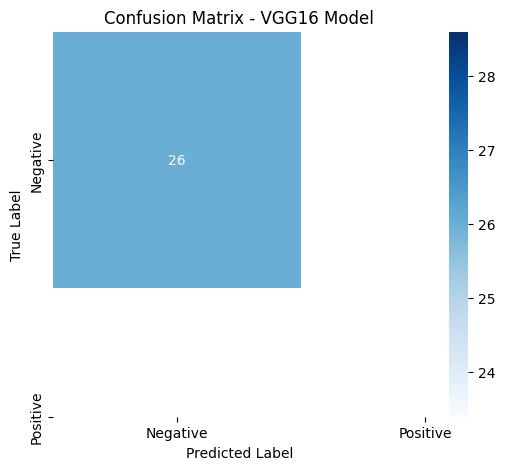

C:\Users\Chaitanya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


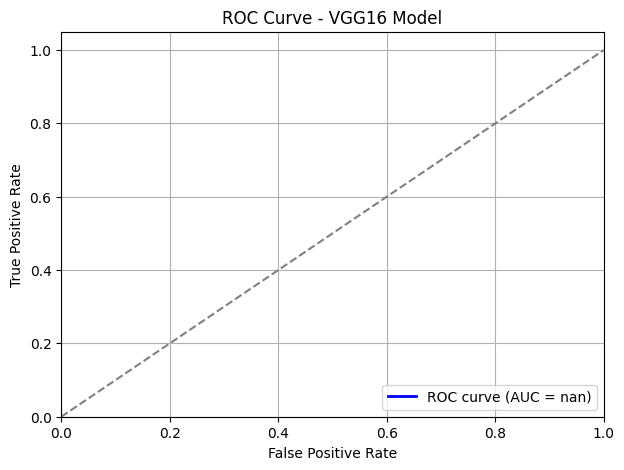

In [3]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Compute Confusion Matrix
cm = confusion_matrix(true_labels.flatten(), predicted_labels.flatten())

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - VGG16 Model")
plt.show()

# Compute ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(true_labels.flatten(), similarity_scores.flatten())
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - VGG16 Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# RFC Algorithm Model-3

Accuracy: 100.00%
Precision: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000


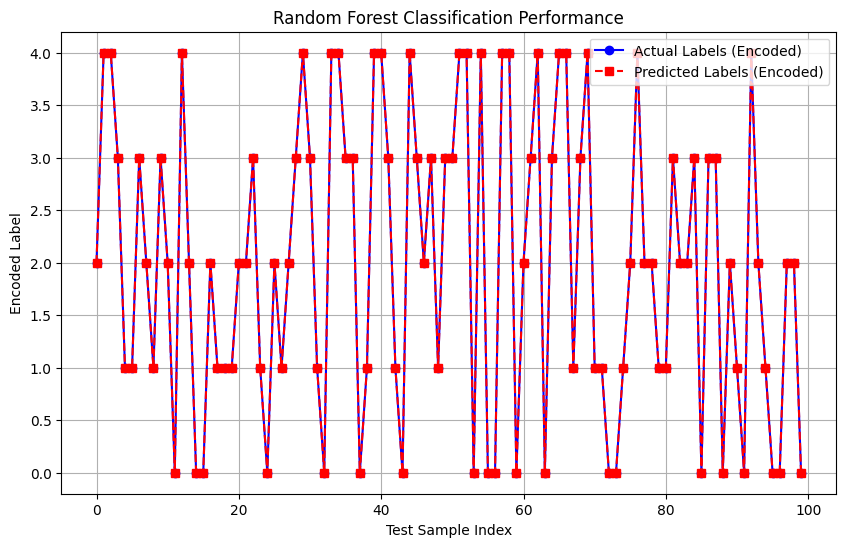

C:\Users\Chaitanya\AppData\Local\Temp\ipykernel_4624\3943158371.py:61: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(range(len(y_test_encoded)), y_test_encoded, c=colors, cmap="viridis", edgecolors='black', s=100, label="Actual")


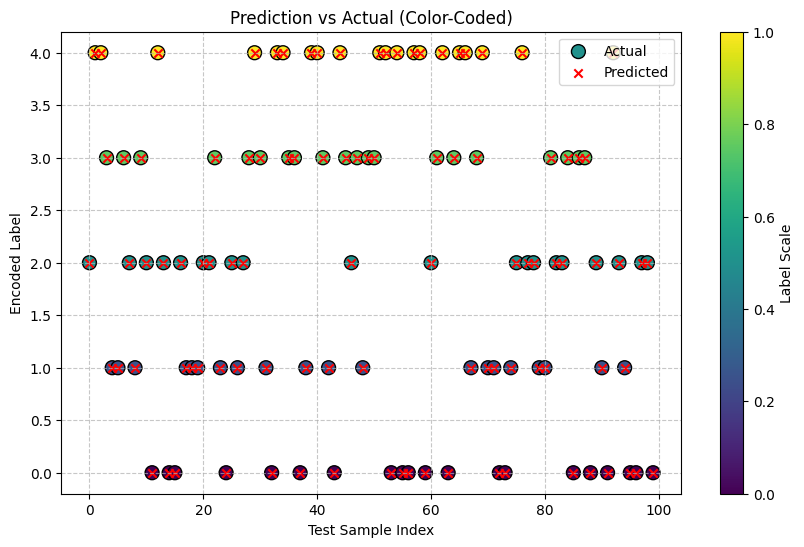

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load Data
data_dict = pickle.load(open('./data.pickle', 'rb'))

data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

# Train Random Forest Classifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

# Calculate Classification Metrics
score = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted', zero_division=1)

print(f'Accuracy: {score * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print("\nClassification Report:\n", classification_report(y_test, y_predict))

# ---- Optional: Convert Labels to Numeric for Regression Metrics ----
encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)
y_predict_encoded = encoder.transform(y_predict)

# Compute MAE and MSE only if needed
mae = np.mean(np.abs(y_test_encoded - y_predict_encoded))
mse = np.mean((y_test_encoded - y_predict_encoded) ** 2)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# Plot Line Graph
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test_encoded, marker='o', linestyle='-', label='Actual Labels (Encoded)', color='blue')
plt.plot(range(len(y_predict)), y_predict_encoded, marker='s', linestyle='--', label='Predicted Labels (Encoded)', color='red')
plt.xlabel("Test Sample Index")
plt.ylabel("Encoded Label")
plt.title("Random Forest Classification Performance")
plt.legend()
plt.grid(True)
plt.show()


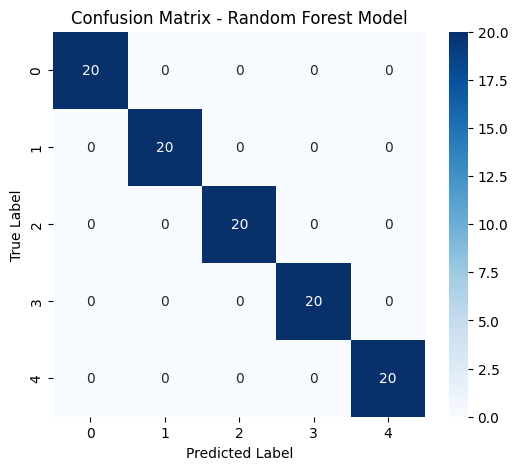

ROC Curve is only applicable for binary classification.


In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_predict)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Model")
plt.show()

# Compute ROC Curve and AUC Score (only if binary classification)
if len(np.unique(y_test)) == 2:
    y_test_binary = encoder.transform(y_test)  # Convert labels to numeric
    y_predict_proba = model.predict_proba(x_test)[:, 1]  # Get probability scores for the positive class

    fpr, tpr, _ = roc_curve(y_test_binary, y_predict_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Random Forest Model")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
else:
    print("ROC Curve is only applicable for binary classification.")
